In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('C:\\Users\\PC\\Downloads\\all_ticks_wide.csv')

df

,timestamp,AEFES,AKBNK,AKSA,AKSEN,ALARK,ALBRK,ANACM,ARCLK,ASELS,...,TTKOM,TUKAS,TUPRS,USAK,VAKBN,VESTL,YATAS,YKBNK,YUNSA,ZOREN
0,2012-09-17T06:45:00Z,22.3978,5.2084,1.7102,3.87,1.4683,1.1356,1.0634,6.9909,2.9948,...,4.2639,0.96,29.8072,1.0382,3.8620,1.90,0.4172,2.5438,2.2619,0.7789
1,2012-09-17T07:00:00Z,22.3978,5.1938,1.7066,3.86,1.4574,1.1275,1.0634,6.9259,2.9948,...,4.2521,0.96,29.7393,1.0382,3.8529,1.90,0.4229,2.5266,2.2462,0.7789
2,2012-09-17T07:15:00Z,22.3978,5.2084,1.7102,NaN,1.4610,1.1356,1.0679,6.9909,2.9855,...,4.2521,0.97,29.6716,1.0463,3.8436,1.91,0.4229,2.5266,2.2566,0.7789
3,2012-09-17T07:30:00Z,22.3978,5.1938,1.7102,3.86,1.4537,1.1275,1.0679,6.9584,2.9855,...,4.2521,0.97,29.7393,1.0382,3.8529,1.91,0.4286,2.5324,2.2619,0.7860
4,2012-09-17T07:45:00Z,22.5649,5.2084,1.7102,3.87,1.4574,1.1356,1.0725,6.9909,2.9760,...,4.2521,0.97,29.8072,1.0382,3.8620,1.90,0.4286,2.5324,2.2619,0.7789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50007,2019-07-23T14:00:00Z,20.4800,7.7300,9.1400,2.47,3.2300,1.2100,2.8400,20.3000,NaN,...,5.6000,4.34,131.6000,1.0500,4.8600,9.98,5.3500,2.7500,4.2500,NaN
50008,2019-07-23T14:15:00Z,20.5000,7.7200,9.1400,2.47,3.2200,1.2100,2.8400,20.3200,NaN,...,5.5700,4.35,131.5000,1.0500,4.8600,9.98,5.3400,2.7500,4.2400,NaN
50009,2019-07-23T14:30:00Z,20.5000,7.7400,9.1300,2.46,3.2300,1.2100,2.8300,20.3400,NaN,...,5.5700,4.36,131.5000,1.0500,4.8600,9.96,5.3400,2.7600,4.2400,NaN
50010,2019-07-23T14:45:00Z,20.4000,7.7000,9.1400,2.47,3.2400,1.2100,2.8200,20.3800,NaN,...,5.5700,4.35,131.3000,1.0400,4.8600,9.94,5.3400,2.7700,4.2400,NaN


# finding the stocks 

In [4]:
#sorting chronologically
df['timestamp'] = pd.to_datetime(df['timestamp'])

df = df.sort_values(by='timestamp')

In [5]:
#needed to save as a json file as data was too big 
import json

non_na_indices_dict = {}
for column in df.columns:
    if column != 'timestamp':
        non_na_indices = df[df[column].notna()].index.tolist()
        non_na_indices_dict[column] = non_na_indices

# Saving the dictionary to a JSON file
with open('non_na_indices.json', 'w') as f:
    json.dump(non_na_indices_dict, f)

In [6]:
#here we got help from chatgpt in order to find consecutive indices
#please check references below to find the ChatGPT prompts
#however, there was not enough data points without any NA values getting in between 
#as you can see below, the number of rows we need is more than 15000 in order to get a time span longer than 2 years
#however, when we adjust the na_gap to be 0, the output did not have any such spans as can be seen below:

In [ ]:
 """import json

def find_consecutive_indices(file_path, required_length=0):
    with open(file_path, 'r') as f:
        non_na_indices_dict = json.load(f)

    result = {}
    for column, indices in non_na_indices_dict.items():
        start = None
        count = 0
        max_sequence = {"start": None, "end": None, "length": 0}
        na_count = 0

        for i in range(len(indices)):
            if start is None:
                start = indices[i]
                count = 1
            elif indices[i] == indices[i - 1] + 1:
                count += 1
                na_count = 0  # Reset NA counter as we have a consecutive index
            else:
                na_gap = indices[i] - indices[i - 1] - 1
                if na_gap < 1:
                    count += 1 + na_gap  # Include the NA indices in the count
                    na_count += na_gap
                else:
                    if count - na_count >= required_length and count - na_count > max_sequence["length"]:
                        max_sequence = {"start": start, "end": indices[i - 1], "length": count - na_count}
                    start = indices[i]
                    count = 1
                    na_count = 0  # Reset NA counter

        # Check for sequence at the end of the list
        if count - na_count >= required_length and count - na_count > max_sequence["length"]:
            max_sequence = {"start": start, "end": indices[-1], "length": count - na_count}

        if max_sequence["start"] is not None:
            result[column] = {"start": max_sequence["start"], "end": max_sequence["end"]}

    return result

# The path to the JSON file
file_path = 'non_na_indices.json'

# Finding consecutive indices with a required length of 1
consecutive_indices = find_consecutive_indices(file_path, required_length=1)
print(consecutive_indices)"""


In [8]:
#hence we decided to ignore one NA value and find the time spans accordingly 

In [9]:
import json

def find_consecutive_indices(file_path, required_length=0):
    with open(file_path, 'r') as f:
        non_na_indices_dict = json.load(f)

    result = {}
    for column, indices in non_na_indices_dict.items():
        start = None
        count = 0
        max_sequence = {"start": None, "end": None, "length": 0}
        na_count = 0

        for i in range(len(indices)):
            if start is None:
                start = indices[i]
                count = 1
            elif indices[i] == indices[i - 1] + 1:
                count += 1
                na_count = 0  # Reset NA counter as we have a consecutive index
            else:
                na_gap = indices[i] - indices[i - 1] - 1
                if na_gap < 2:
                    count += 1 + na_gap  # Include the NA indices in the count
                    na_count += na_gap
                else:
                    if count - na_count >= required_length and count - na_count > max_sequence["length"]:
                        max_sequence = {"start": start, "end": indices[i - 1], "length": count - na_count}
                    start = indices[i]
                    count = 1
                    na_count = 0  # Reset NA counter

        # Check for sequence at the end of the list
        if count - na_count >= required_length and count - na_count > max_sequence["length"]:
            max_sequence = {"start": start, "end": indices[-1], "length": count - na_count}

        if max_sequence["start"] is not None:
            result[column] = {"start": max_sequence["start"], "end": max_sequence["end"]}

    return result

# The path to the JSON file
file_path = 'non_na_indices.json'

# Finding consecutive indices with a required length of 1
consecutive_indices = find_consecutive_indices(file_path, required_length=1)
print(consecutive_indices)


{'AEFES': {'start': 40185, 'end': 43468}, 'AKBNK': {'start': 21912, 'end': 50011}, 'AKSA': {'start': 38650, 'end': 42733}, 'AKSEN': {'start': 34601, 'end': 41645}, 'ALARK': {'start': 12035, 'end': 19163}, 'ALBRK': {'start': 35550, 'end': 42423}, 'ANACM': {'start': 33467, 'end': 48094}, 'ARCLK': {'start': 22510, 'end': 50011}, 'ASELS': {'start': 21912, 'end': 40803}, 'ASUZU': {'start': 39213, 'end': 43193}, 'AYGAZ': {'start': 31574, 'end': 38520}, 'BAGFS': {'start': 12745, 'end': 21909}, 'BANVT': {'start': 36248, 'end': 45378}, 'BRISA': {'start': 11146, 'end': 19495}, 'CCOLA': {'start': 22024, 'end': 45441}, 'CEMAS': {'start': 43663, 'end': 50011}, 'ECILC': {'start': 31606, 'end': 41933}, 'EREGL': {'start': 11146, 'end': 50011}, 'FROTO': {'start': 19804, 'end': 45441}, 'GARAN': {'start': 11145, 'end': 50011}, 'GOODY': {'start': 25004, 'end': 41933}, 'GUBRF': {'start': 34475, 'end': 48094}, 'HALKB': {'start': 11146, 'end': 50011}, 'ICBCT': {'start': 44423, 'end': 49563}, 'ISCTR': {'start

In [10]:
#the stocks and their time intervals are chosen from the list above:

In [11]:
columns_to_select = ['timestamp','ARCLK', 'AKBNK', 'EREGL', 'HALKB','KRDMD', 'THYAO' ]
filtered_df = df.loc[33000:50011, columns_to_select]


In [12]:
filtered_df

,timestamp,ARCLK,AKBNK,EREGL,HALKB,KRDMD,THYAO
33000,2017-05-29 12:45:00+00:00,23.9375,7.9128,5.1281,12.1972,1.4806,7.34
33001,2017-05-29 13:00:00+00:00,23.9761,7.9128,5.1360,12.1972,1.4900,7.34
33002,2017-05-29 13:15:00+00:00,23.9568,7.9210,5.1281,12.2068,1.4806,7.33
33003,2017-05-29 13:30:00+00:00,23.9568,7.9210,5.1281,12.1972,1.4806,7.31
33004,2017-05-29 13:45:00+00:00,23.8989,7.9045,5.1281,12.1875,1.4806,7.31
...,...,...,...,...,...,...,...
50007,2019-07-23 14:00:00+00:00,20.3000,7.7300,7.6900,6.3600,2.2800,13.06
50008,2019-07-23 14:15:00+00:00,20.3200,7.7200,7.6500,6.3500,2.2800,13.06
50009,2019-07-23 14:30:00+00:00,20.3400,7.7400,7.6700,6.3500,2.2800,13.07
50010,2019-07-23 14:45:00+00:00,20.3800,7.7000,7.6700,6.3300,2.2800,13.05


In [13]:
# additional information about the data 

In [14]:
#we tried another algorithm in order to find a time span where 6 stocks had no NA values
#however, it did not work as well, you can see the detailed code of that algorithm below as well

In [15]:
nan_count = df.isna().sum().sum()
nan_count

152690

In [16]:
50012 * 61

3050732

Here is the strategy we adopted to find a 2-year time window in which 6 stock data have no null value.
For each of the stock data, we carry out the following operations:
   * i. We tag the recorded entries as 1 and null values as 0. 
   * ii. Then we compute rolling sums with a window size of 15000 (this is approximately the number of rows needed for a 2-year period).
   * iii. There are two possibilities of interest: if the rolling sum for a row equals to the window size itself, then -starting from the row in issue- there are window size of consecutive rows that none of which is null, if, on the other hand, the rolling sum is less than the window size, there is at least one null value in the sequence that starts from the row in issue and has a length of window size. Therefore, we tag the former ones -that is, the rows that initialize an acceptable time sequence.

iv. After obtaining the rows that initialize an acceptable time sequence for each stock data, we thereby obtain a dataframe that can be defined as follows (t stands for time and s stands for stock): 
    if the entry in row t and column s is 1, then we have an acceptable (meaning, 2-year full data without nulls) sequence for stock s starting from time t

v. Finally, we can check how many stocks can offer an acceptable sequence starting from a certain row simply by summing up the values of that row. If the obtained value is at least 6, then for that row, we have at least 6 stocks that have acceptable sequences.

Upon implementing the aforementioned strategy, however, we found out that there is no such time that satisfies the desired criteria. Therefore, assuming that the strategy is valid and implemented correctly -which are open to discussion of course-, we concluded that the task is impossible, and we simply picked two years and six stock indices without these concerns and analyzed them.

In [17]:
df.set_index('timestamp', inplace=True)

In [18]:
df.head()

,AEFES,AKBNK,AKSA,AKSEN,ALARK,ALBRK,ANACM,ARCLK,ASELS,ASUZU,...,TTKOM,TUKAS,TUPRS,USAK,VAKBN,VESTL,YATAS,YKBNK,YUNSA,ZOREN
timestamp,,,,,,,,,,,,,,,,,,,,,
2012-09-17 06:45:00+00:00,22.3978,5.2084,1.7102,3.87,1.4683,1.1356,1.0634,6.9909,2.9948,2.4998,...,4.2639,0.96,29.8072,1.0382,3.8620,1.90,0.4172,2.5438,2.2619,0.7789
2012-09-17 07:00:00+00:00,22.3978,5.1938,1.7066,3.86,1.4574,1.1275,1.0634,6.9259,2.9948,2.5100,...,4.2521,0.96,29.7393,1.0382,3.8529,1.90,0.4229,2.5266,2.2462,0.7789
2012-09-17 07:15:00+00:00,22.3978,5.2084,1.7102,NaN,1.4610,1.1356,1.0679,6.9909,2.9855,2.4796,...,4.2521,0.97,29.6716,1.0463,3.8436,1.91,0.4229,2.5266,2.2566,0.7789
2012-09-17 07:30:00+00:00,22.3978,5.1938,1.7102,3.86,1.4537,1.1275,1.0679,6.9584,2.9855,2.4897,...,4.2521,0.97,29.7393,1.0382,3.8529,1.91,0.4286,2.5324,2.2619,0.7860
2012-09-17 07:45:00+00:00,22.5649,5.2084,1.7102,3.87,1.4574,1.1356,1.0725,6.9909,2.9760,2.4897,...,4.2521,0.97,29.8072,1.0382,3.8620,1.90,0.4286,2.5324,2.2619,0.7789


In [19]:
# step (i)
df1 = df.copy()
for col in df.columns:
    df1[col] = df1[col].notna().astype('int')

In [20]:
df1.head()

,AEFES,AKBNK,AKSA,AKSEN,ALARK,ALBRK,ANACM,ARCLK,ASELS,ASUZU,...,TTKOM,TUKAS,TUPRS,USAK,VAKBN,VESTL,YATAS,YKBNK,YUNSA,ZOREN
timestamp,,,,,,,,,,,,,,,,,,,,,
2012-09-17 06:45:00+00:00,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2012-09-17 07:00:00+00:00,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2012-09-17 07:15:00+00:00,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2012-09-17 07:30:00+00:00,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2012-09-17 07:45:00+00:00,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [21]:
# step (ii)
window_size = 15000
df2 = (df1.iloc[::-1]
        .rolling(window_size, min_periods=0)
        .sum()
        .iloc[::-1])

In [22]:
df2.head()

,AEFES,AKBNK,AKSA,AKSEN,ALARK,ALBRK,ANACM,ARCLK,ASELS,ASUZU,...,TTKOM,TUKAS,TUPRS,USAK,VAKBN,VESTL,YATAS,YKBNK,YUNSA,ZOREN
timestamp,,,,,,,,,,,,,,,,,,,,,
2012-09-17 06:45:00+00:00,14133.0,14843.0,14391.0,14061.0,14127.0,13373.0,14013.0,14711.0,14817.0,14673.0,...,14699.0,12859.0,14743.0,13932.0,14803.0,14403.0,12284.0,14819.0,12067.0,14464.0
2012-09-17 07:00:00+00:00,14133.0,14843.0,14391.0,14061.0,14127.0,13373.0,14013.0,14711.0,14817.0,14673.0,...,14699.0,12859.0,14743.0,13932.0,14803.0,14403.0,12284.0,14819.0,12067.0,14464.0
2012-09-17 07:15:00+00:00,14133.0,14843.0,14391.0,14061.0,14127.0,13373.0,14013.0,14711.0,14817.0,14673.0,...,14699.0,12859.0,14743.0,13932.0,14803.0,14403.0,12284.0,14819.0,12067.0,14464.0
2012-09-17 07:30:00+00:00,14133.0,14843.0,14391.0,14062.0,14127.0,13373.0,14013.0,14711.0,14817.0,14673.0,...,14699.0,12859.0,14743.0,13932.0,14803.0,14403.0,12284.0,14819.0,12067.0,14464.0
2012-09-17 07:45:00+00:00,14133.0,14843.0,14391.0,14062.0,14127.0,13373.0,14013.0,14711.0,14817.0,14673.0,...,14699.0,12859.0,14743.0,13932.0,14803.0,14403.0,12284.0,14819.0,12067.0,14464.0


In [23]:
# step (iii)
for col in df2.columns:
    df2[col] = df2[col] == window_size

In [24]:
df2

,AEFES,AKBNK,AKSA,AKSEN,ALARK,ALBRK,ANACM,ARCLK,ASELS,ASUZU,...,TTKOM,TUKAS,TUPRS,USAK,VAKBN,VESTL,YATAS,YKBNK,YUNSA,ZOREN
timestamp,,,,,,,,,,,,,,,,,,,,,
2012-09-17 06:45:00+00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2012-09-17 07:00:00+00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2012-09-17 07:15:00+00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2012-09-17 07:30:00+00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2012-09-17 07:45:00+00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-07-23 14:00:00+00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2019-07-23 14:15:00+00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2019-07-23 14:30:00+00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
# step (iv)
df2['col_sum'] = df2.sum(axis=1)

In [26]:
# step (v)
df2[df2['col_sum'] >= 6]

,AEFES,AKBNK,AKSA,AKSEN,ALARK,ALBRK,ANACM,ARCLK,ASELS,ASUZU,...,TUKAS,TUPRS,USAK,VAKBN,VESTL,YATAS,YKBNK,YUNSA,ZOREN,col_sum
timestamp,,,,,,,,,,,,,,,,,,,,,


# data preparation

In [28]:
df = pd.read_csv('C:\\Users\\PC\\Downloads\\all_ticks_wide.csv')
df

,timestamp,AEFES,AKBNK,AKSA,AKSEN,ALARK,ALBRK,ANACM,ARCLK,ASELS,...,TTKOM,TUKAS,TUPRS,USAK,VAKBN,VESTL,YATAS,YKBNK,YUNSA,ZOREN
0,2012-09-17T06:45:00Z,22.3978,5.2084,1.7102,3.87,1.4683,1.1356,1.0634,6.9909,2.9948,...,4.2639,0.96,29.8072,1.0382,3.8620,1.90,0.4172,2.5438,2.2619,0.7789
1,2012-09-17T07:00:00Z,22.3978,5.1938,1.7066,3.86,1.4574,1.1275,1.0634,6.9259,2.9948,...,4.2521,0.96,29.7393,1.0382,3.8529,1.90,0.4229,2.5266,2.2462,0.7789
2,2012-09-17T07:15:00Z,22.3978,5.2084,1.7102,NaN,1.4610,1.1356,1.0679,6.9909,2.9855,...,4.2521,0.97,29.6716,1.0463,3.8436,1.91,0.4229,2.5266,2.2566,0.7789
3,2012-09-17T07:30:00Z,22.3978,5.1938,1.7102,3.86,1.4537,1.1275,1.0679,6.9584,2.9855,...,4.2521,0.97,29.7393,1.0382,3.8529,1.91,0.4286,2.5324,2.2619,0.7860
4,2012-09-17T07:45:00Z,22.5649,5.2084,1.7102,3.87,1.4574,1.1356,1.0725,6.9909,2.9760,...,4.2521,0.97,29.8072,1.0382,3.8620,1.90,0.4286,2.5324,2.2619,0.7789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50007,2019-07-23T14:00:00Z,20.4800,7.7300,9.1400,2.47,3.2300,1.2100,2.8400,20.3000,NaN,...,5.6000,4.34,131.6000,1.0500,4.8600,9.98,5.3500,2.7500,4.2500,NaN
50008,2019-07-23T14:15:00Z,20.5000,7.7200,9.1400,2.47,3.2200,1.2100,2.8400,20.3200,NaN,...,5.5700,4.35,131.5000,1.0500,4.8600,9.98,5.3400,2.7500,4.2400,NaN
50009,2019-07-23T14:30:00Z,20.5000,7.7400,9.1300,2.46,3.2300,1.2100,2.8300,20.3400,NaN,...,5.5700,4.36,131.5000,1.0500,4.8600,9.96,5.3400,2.7600,4.2400,NaN
50010,2019-07-23T14:45:00Z,20.4000,7.7000,9.1400,2.47,3.2400,1.2100,2.8200,20.3800,NaN,...,5.5700,4.35,131.3000,1.0400,4.8600,9.94,5.3400,2.7700,4.2400,NaN


In [29]:
# convert to datetime and sort
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.sort_values('timestamp', inplace=True)

# add columns for year, month, day etc.
# these will become handy in computing monthly stats, and joining with the search data
df["year"] = df["timestamp"].dt.year
df["month"] = df["timestamp"].dt.month
df["day"] = df["timestamp"].dt.day
df["hour"] = df["timestamp"].dt.hour
df["minute"] = df["timestamp"].dt.minute

df['month_start'] = pd.to_datetime(df['year'].astype('str') + '-' + df['month'].astype('str'), format='%Y-%m')

df['week'] = df['timestamp'].dt.isocalendar().week
week_start_dates = df.groupby(['year', 'week']).agg({'timestamp':'first'})
week_start_dates['timestamp'] = pd.to_datetime(week_start_dates['timestamp'].astype('str').str.split(' ').str[0], format='%Y-%m-%d')
week_start_dates.rename(columns={'timestamp':'week_start'}, inplace=True)
week_start_dates.reset_index(inplace=True)

df = df.merge(week_start_dates, on=['year', 'week'], how='left')

In [30]:
df

,timestamp,AEFES,AKBNK,AKSA,AKSEN,ALARK,ALBRK,ANACM,ARCLK,ASELS,...,YUNSA,ZOREN,year,month,day,hour,minute,month_start,week,week_start
0,2012-09-17 06:45:00+00:00,22.3978,5.2084,1.7102,3.87,1.4683,1.1356,1.0634,6.9909,2.9948,...,2.2619,0.7789,2012,9,17,6,45,2012-09-01,38,2012-09-17
1,2012-09-17 07:00:00+00:00,22.3978,5.1938,1.7066,3.86,1.4574,1.1275,1.0634,6.9259,2.9948,...,2.2462,0.7789,2012,9,17,7,0,2012-09-01,38,2012-09-17
2,2012-09-17 07:15:00+00:00,22.3978,5.2084,1.7102,NaN,1.4610,1.1356,1.0679,6.9909,2.9855,...,2.2566,0.7789,2012,9,17,7,15,2012-09-01,38,2012-09-17
3,2012-09-17 07:30:00+00:00,22.3978,5.1938,1.7102,3.86,1.4537,1.1275,1.0679,6.9584,2.9855,...,2.2619,0.7860,2012,9,17,7,30,2012-09-01,38,2012-09-17
4,2012-09-17 07:45:00+00:00,22.5649,5.2084,1.7102,3.87,1.4574,1.1356,1.0725,6.9909,2.9760,...,2.2619,0.7789,2012,9,17,7,45,2012-09-01,38,2012-09-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50007,2019-07-23 14:00:00+00:00,20.4800,7.7300,9.1400,2.47,3.2300,1.2100,2.8400,20.3000,NaN,...,4.2500,NaN,2019,7,23,14,0,2019-07-01,30,2019-07-22
50008,2019-07-23 14:15:00+00:00,20.5000,7.7200,9.1400,2.47,3.2200,1.2100,2.8400,20.3200,NaN,...,4.2400,NaN,2019,7,23,14,15,2019-07-01,30,2019-07-22
50009,2019-07-23 14:30:00+00:00,20.5000,7.7400,9.1300,2.46,3.2300,1.2100,2.8300,20.3400,NaN,...,4.2400,NaN,2019,7,23,14,30,2019-07-01,30,2019-07-22
50010,2019-07-23 14:45:00+00:00,20.4000,7.7000,9.1400,2.47,3.2400,1.2100,2.8200,20.3800,NaN,...,4.2400,NaN,2019,7,23,14,45,2019-07-01,30,2019-07-22


In [31]:
import glob
csv_files = glob.glob("*.csv")
print("CSV Files in Current Directory:", csv_files)


CSV Files in Current Directory: ['search_AKBNK.csv', 'search_ARCLK.csv', 'search_EREGL.csv', 'search_HALKB.csv', 'search_KRDMD.csv', 'search_THYAO.csv']


In [34]:
stocks = ['ARCLK', 'AKBNK', 'EREGL', 'HALKB', 'KRDMD', 'THYAO']

time_cols = ['timestamp', 'year', 'month', 'day', 'hour', 'minute', 'month_start', 'week', 'week_start']

stock_dfs = []
# stock_dfs_temp = []

# for each stock data
for index in stocks:
    stock_df = df[time_cols + [index]]
    
    # define time window
    stock_df = stock_df[(stock_df['timestamp']>="2017-05-29 12:45:00+00:00")&(stock_df['timestamp']<="2019-07-23 15:00:00+00:00")]
    
    # calculate monthly stats
    monthly_stats = stock_df.groupby('month_start')[index].agg('describe')[['mean', 'std', '25%', '75%']]
    monthly_stats.rename(columns={'25%':'Q1', '75%':'Q3'}, inplace=True)
    monthly_stats.rename(columns={col:f"monthly_{col}" for col in monthly_stats.columns}, inplace=True)
    
    monthly_stats['monthly_iqr'] = monthly_stats['monthly_Q3']-monthly_stats['monthly_Q1']
    monthly_stats['monthly_lb_iqr'] = monthly_stats['monthly_Q1']-monthly_stats['monthly_iqr']
    monthly_stats['monthly_ub_iqr'] = monthly_stats['monthly_Q3']+monthly_stats['monthly_iqr']

    monthly_stats['monthly_lb_3sigma'] = monthly_stats['monthly_mean'] - 3*monthly_stats['monthly_std']
    monthly_stats['monthly_ub_3sigma'] = monthly_stats['monthly_mean'] + 3*monthly_stats['monthly_std']

    monthly_stats.reset_index(inplace=True)
    
    # join calculated monthly stats with stock data
    stock_df = stock_df.merge(monthly_stats, on='month_start', how='left')

    # flag outliers based on the two criteria
    stock_df['outlier_iqr'] = (stock_df[index] < stock_df['monthly_lb_iqr']) | (stock_df[index] > stock_df['monthly_ub_iqr'])
    stock_df['outlier_3sigma'] = (stock_df[index] < stock_df['monthly_lb_3sigma']) | (stock_df[index] > stock_df['monthly_ub_3sigma'])
    
    # get search data
    search_data = pd.read_csv(f'search_{index}.csv')
    # clean search data
    search_data = search_data.iloc[1:]
    search_data.reset_index(inplace=True)
    search_data.rename(columns={'Kategori: Tüm kategoriler':'weekly_search_volume', 'index':'week_start'}, inplace=True)
    # add week info
    search_data['week_start'] = pd.to_datetime(search_data['week_start'], format='%Y-%m-%d')
    search_data['year'] = search_data['week_start'].dt.year
    search_data['week'] = search_data['week_start'].dt.isocalendar().week
    search_data['weekly_search_volume'] = pd.to_numeric(search_data['weekly_search_volume'])
     
    stock_df = stock_df.merge(search_data[['year', 'week', 'weekly_search_volume']], on=['year', 'week'], how='left') 
    
    stock_dfs.append(stock_df.drop(columns=time_cols).rename(columns={index:'price'}).add_suffix(f'_{index}'))
    #stock_dfs_temp.append(stock_df)

In [35]:
time_df = df[(df['timestamp']>="2017-05-29 12:45:00+00:00")&(df['timestamp']<="2019-07-23 15:00:00+00:00")]
res = pd.concat([time_df[time_cols].reset_index(drop=True)]+stock_dfs, axis=1)
res

,timestamp,year,month,day,hour,minute,month_start,week,week_start,price_ARCLK,...,monthly_Q1_THYAO,monthly_Q3_THYAO,monthly_iqr_THYAO,monthly_lb_iqr_THYAO,monthly_ub_iqr_THYAO,monthly_lb_3sigma_THYAO,monthly_ub_3sigma_THYAO,outlier_iqr_THYAO,outlier_3sigma_THYAO,weekly_search_volume_THYAO
0,2017-05-29 12:45:00+00:00,2017,5,29,12,45,2017-05-01,22,2017-05-29,23.9375,...,7.2475,7.31,0.0625,7.185,7.3725,7.165627,7.398817,False,False,0.0
1,2017-05-29 13:00:00+00:00,2017,5,29,13,0,2017-05-01,22,2017-05-29,23.9761,...,7.2475,7.31,0.0625,7.185,7.3725,7.165627,7.398817,False,False,0.0
2,2017-05-29 13:15:00+00:00,2017,5,29,13,15,2017-05-01,22,2017-05-29,23.9568,...,7.2475,7.31,0.0625,7.185,7.3725,7.165627,7.398817,False,False,0.0
3,2017-05-29 13:30:00+00:00,2017,5,29,13,30,2017-05-01,22,2017-05-29,23.9568,...,7.2475,7.31,0.0625,7.185,7.3725,7.165627,7.398817,False,False,0.0
4,2017-05-29 13:45:00+00:00,2017,5,29,13,45,2017-05-01,22,2017-05-29,23.8989,...,7.2475,7.31,0.0625,7.185,7.3725,7.165627,7.398817,False,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17007,2019-07-23 14:00:00+00:00,2019,7,23,14,0,2019-07-01,30,2019-07-22,20.3000,...,12.4700,13.21,0.7400,11.730,13.9500,11.496764,14.198206,False,False,NaN
17008,2019-07-23 14:15:00+00:00,2019,7,23,14,15,2019-07-01,30,2019-07-22,20.3200,...,12.4700,13.21,0.7400,11.730,13.9500,11.496764,14.198206,False,False,NaN
17009,2019-07-23 14:30:00+00:00,2019,7,23,14,30,2019-07-01,30,2019-07-22,20.3400,...,12.4700,13.21,0.7400,11.730,13.9500,11.496764,14.198206,False,False,NaN
17010,2019-07-23 14:45:00+00:00,2019,7,23,14,45,2019-07-01,30,2019-07-22,20.3800,...,12.4700,13.21,0.7400,11.730,13.9500,11.496764,14.198206,False,False,NaN


In [36]:
res.dropna(subset='timestamp', inplace=True)

# plots

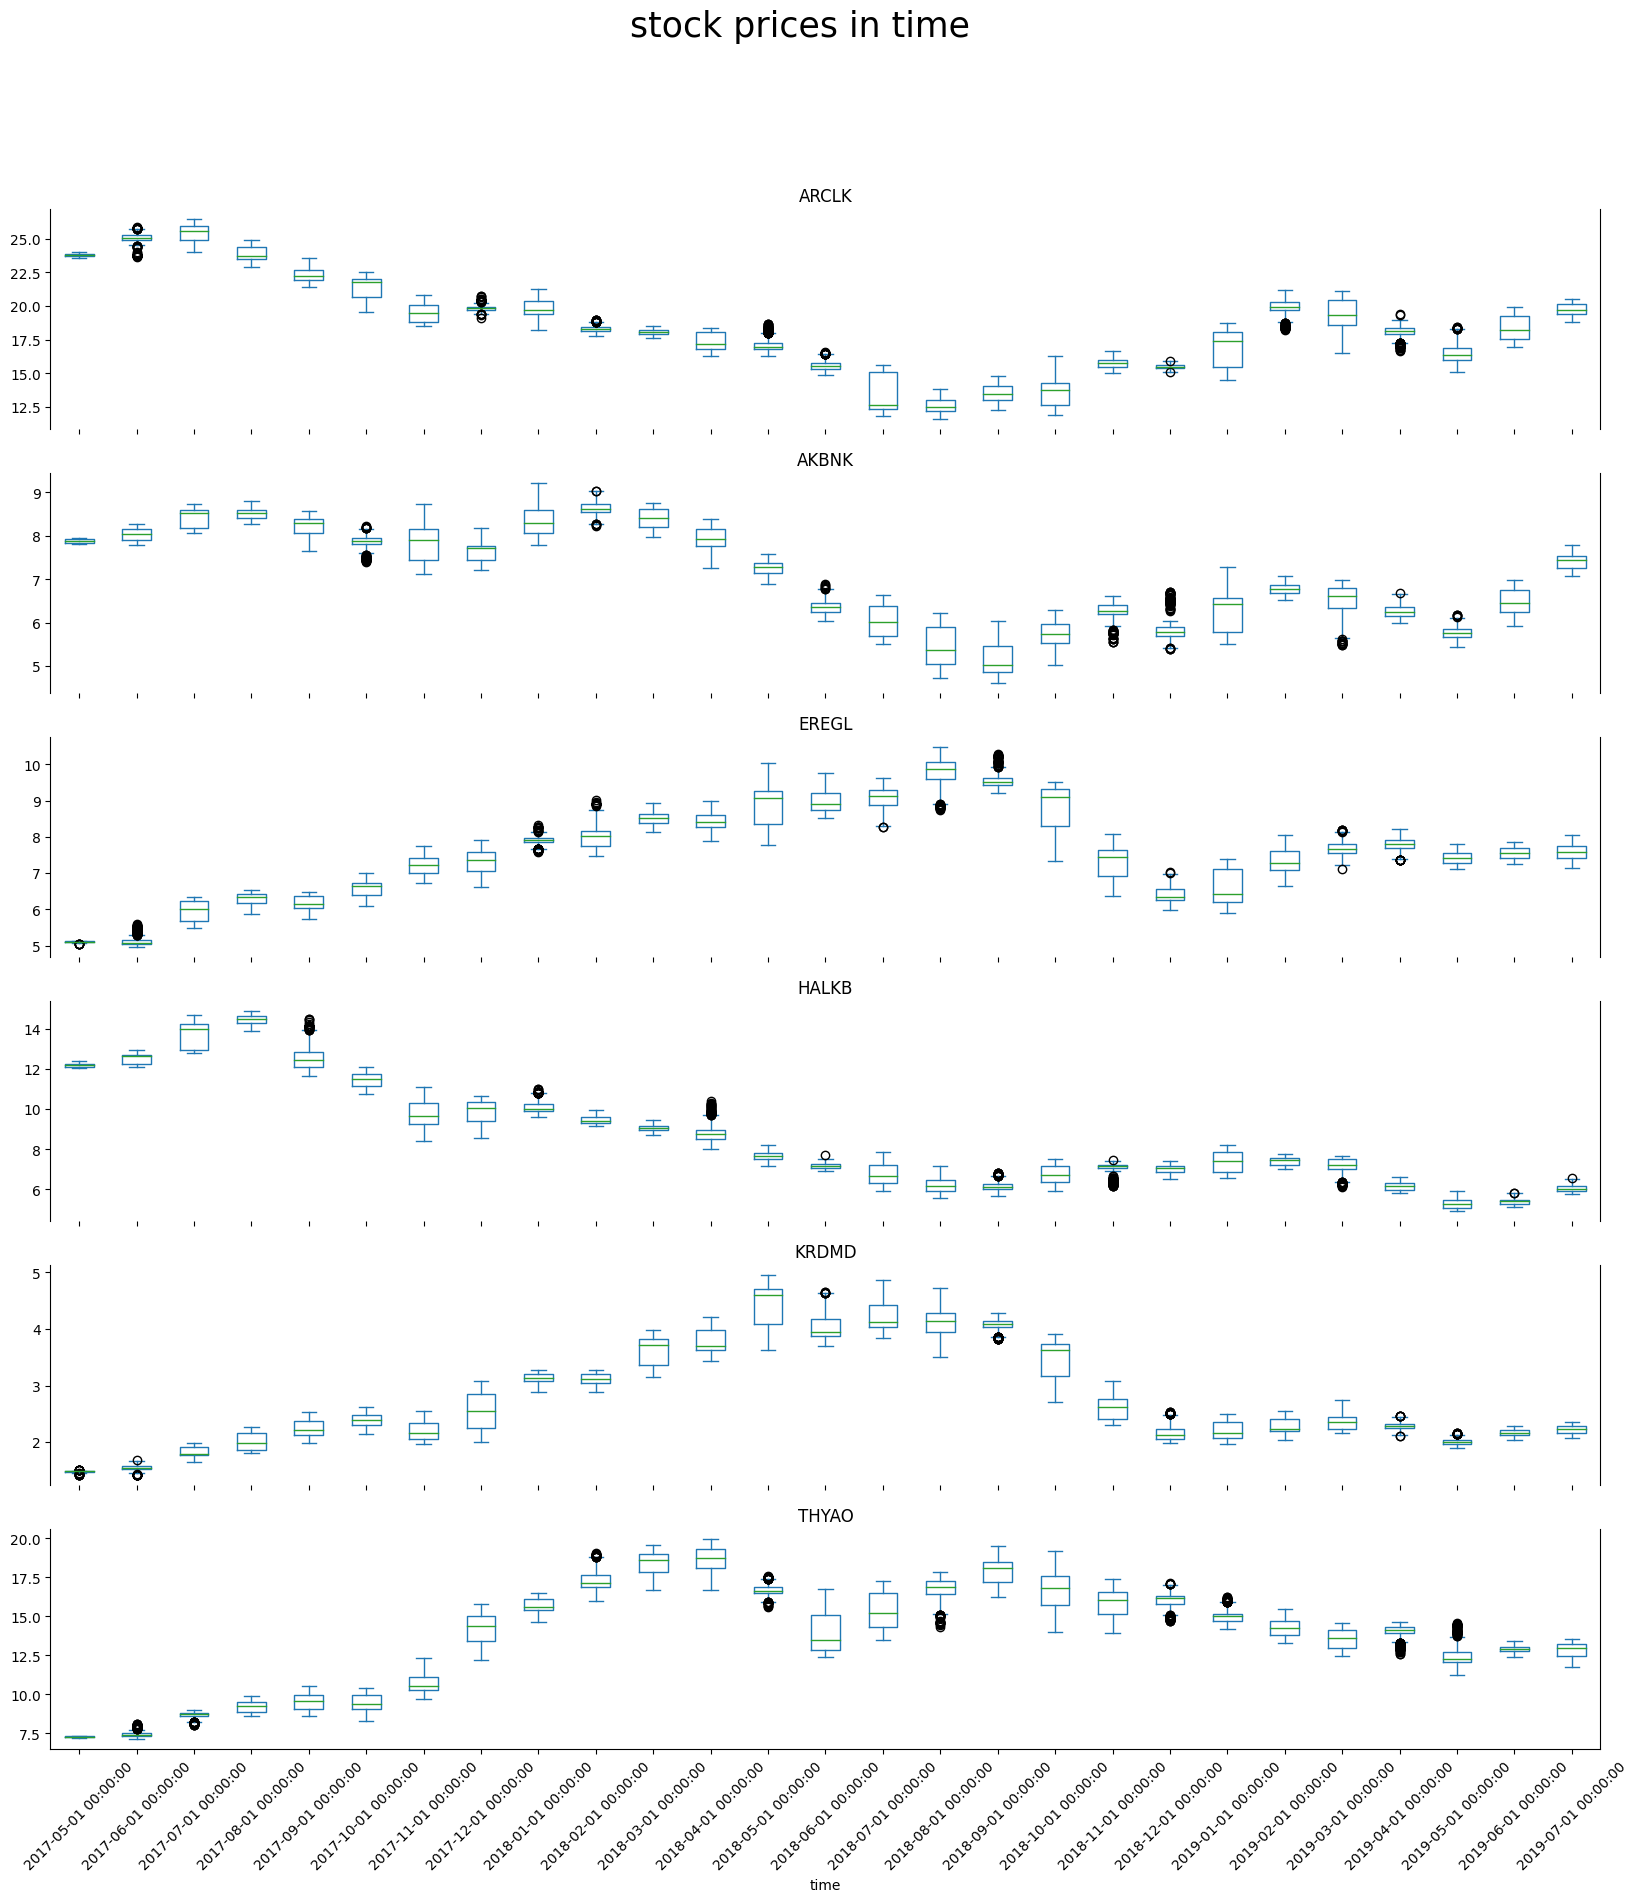

In [37]:
fig, ax = plt.subplots(len(stocks), 1, sharex=True, figsize=(20,20))

for i, stock_name in enumerate(stocks):
    res.assign(index=res.groupby('month_start').cumcount()).pivot(index='index', columns='month_start', values=f'price_{stock_name}').plot(kind='box', ax=ax[i])
    if i != len(stocks)-1:
        ax[i].set_xticks([])
        ax[i].spines['bottom'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].set_title(stock_name)

    
plt.xlabel('time')
plt.suptitle('stock prices in time', size=25)
plt.xticks(rotation=45, visible=True)
plt.show()


In [38]:
print(stock_df.head())


                  timestamp  year  month  day  hour  minute month_start  week  \
0 2017-05-29 12:45:00+00:00  2017      5   29    12      45  2017-05-01    22   
1 2017-05-29 13:00:00+00:00  2017      5   29    13       0  2017-05-01    22   
2 2017-05-29 13:15:00+00:00  2017      5   29    13      15  2017-05-01    22   
3 2017-05-29 13:30:00+00:00  2017      5   29    13      30  2017-05-01    22   
4 2017-05-29 13:45:00+00:00  2017      5   29    13      45  2017-05-01    22   

  week_start  THYAO  ...  monthly_Q1  monthly_Q3  monthly_iqr  monthly_lb_iqr  \
0 2017-05-29   7.34  ...      7.2475        7.31       0.0625           7.185   
1 2017-05-29   7.34  ...      7.2475        7.31       0.0625           7.185   
2 2017-05-29   7.33  ...      7.2475        7.31       0.0625           7.185   
3 2017-05-29   7.31  ...      7.2475        7.31       0.0625           7.185   
4 2017-05-29   7.31  ...      7.2475        7.31       0.0625           7.185   

   monthly_ub_iqr  monthly

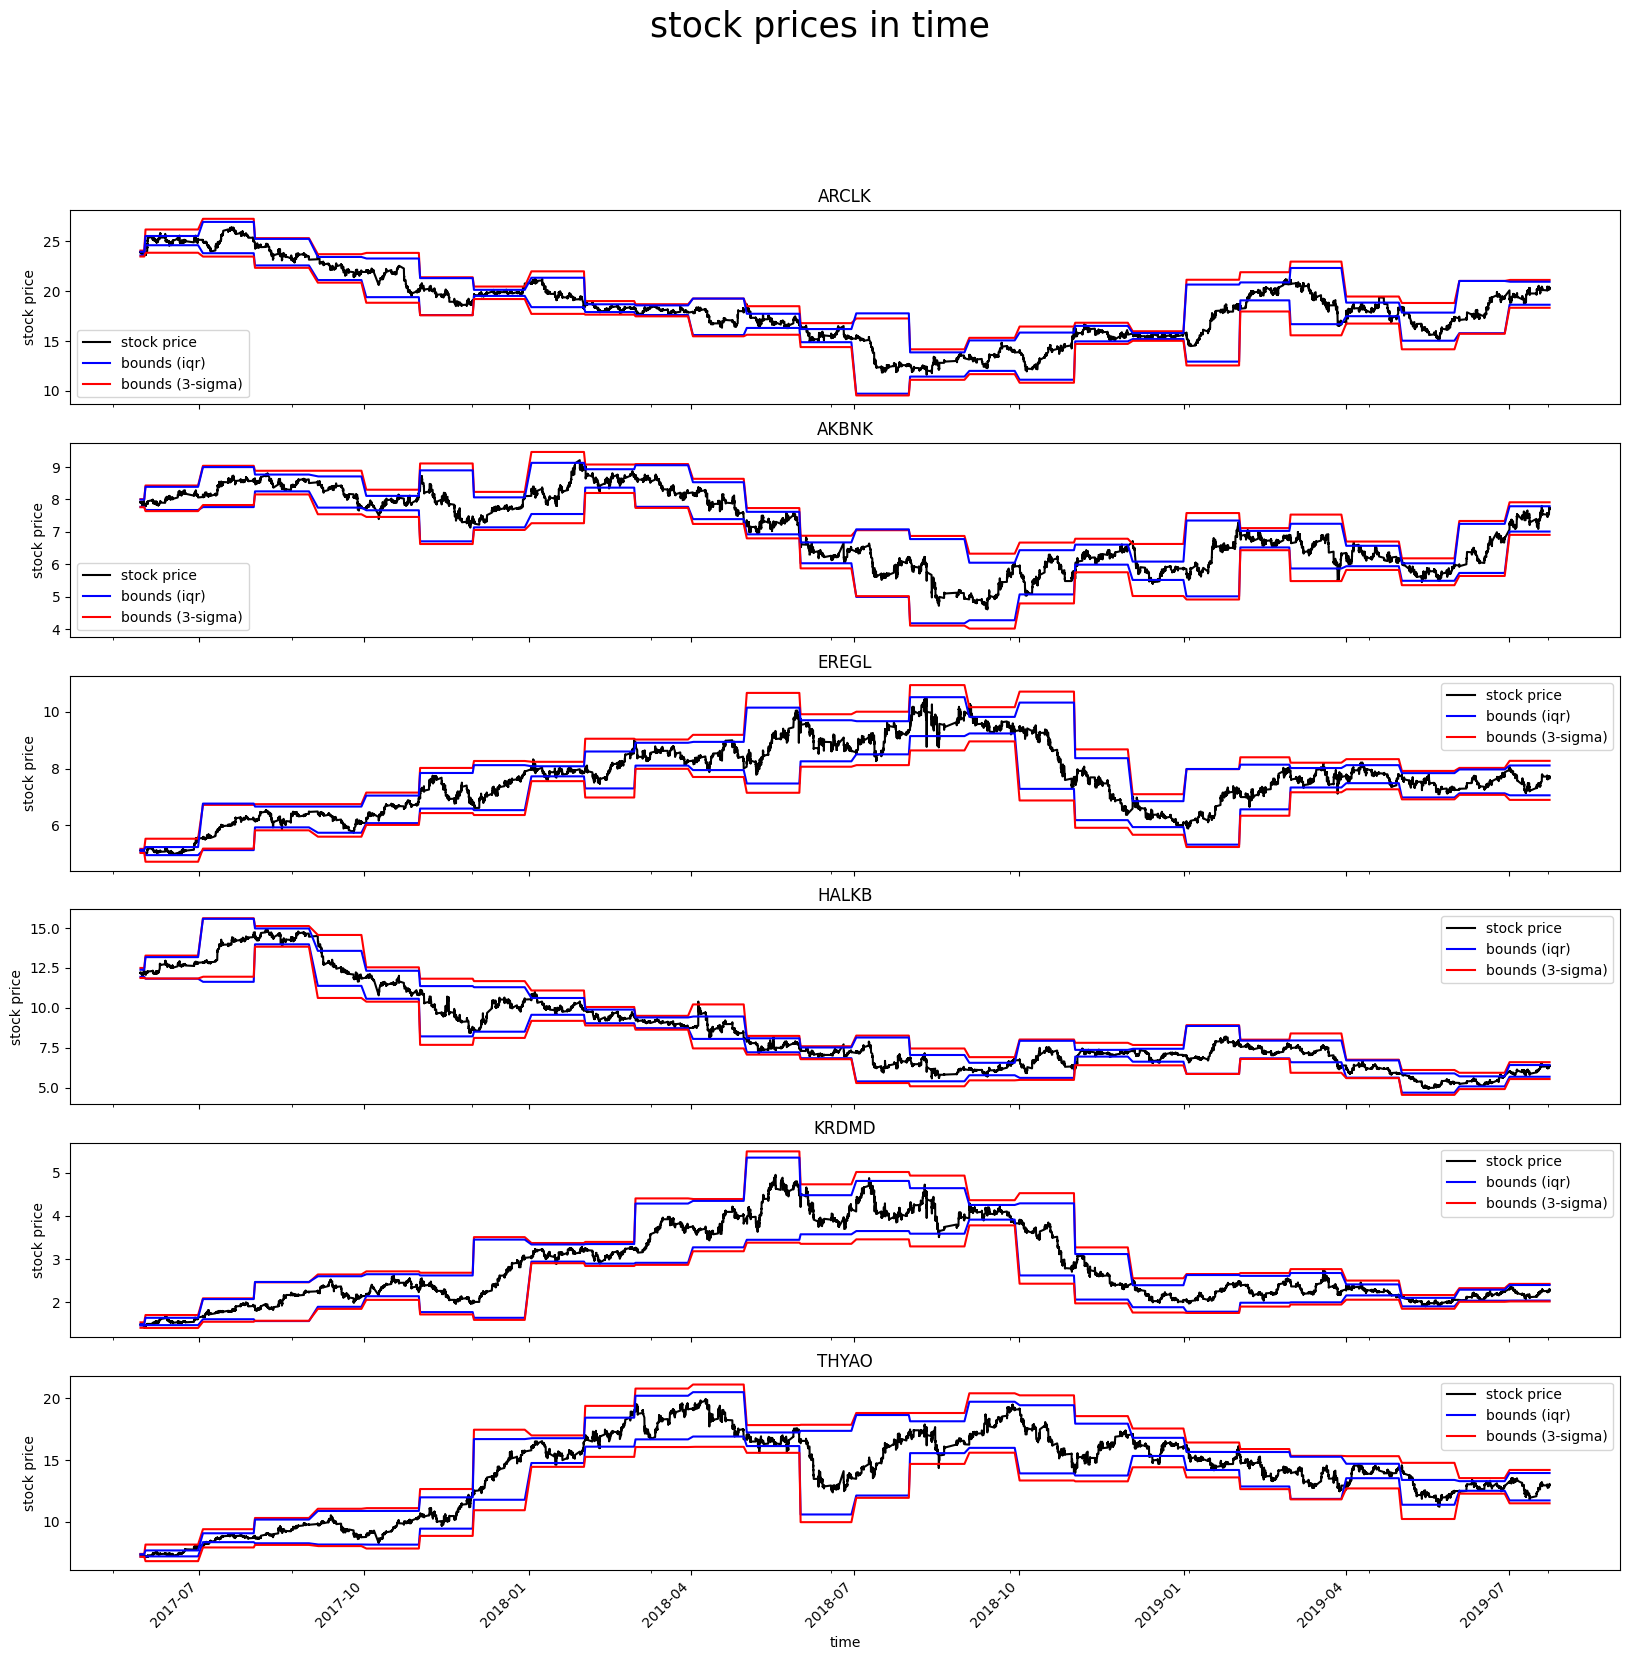

In [39]:
fig, ax = plt.subplots(len(stocks), 1, sharex=True, figsize=(20,20))

for i, stock_name in enumerate(stocks):
    res[['timestamp', f'price_{stock_name}']].set_index('timestamp').plot(color='black', ax=ax[i])
    #ax[i].plot(res['timestamp'], res[f'price_{stock_name}'], color='black')
    ax[i].plot(res['timestamp'], res[f'monthly_lb_iqr_{stock_name}'], color='blue')
    ax[i].plot(res['timestamp'], res[f'monthly_lb_3sigma_{stock_name}'], color='red')
    ax[i].plot(res['timestamp'], res[f'monthly_ub_3sigma_{stock_name}'], color='red')
    ax[i].plot(res['timestamp'], res[f'monthly_ub_iqr_{stock_name}'], color='blue')
    ax[i].legend(['stock price', 'bounds (iqr)', 'bounds (3-sigma)'])
    ax[i].set_ylabel('stock price')
    ax[i].set_title(stock_name)
    
plt.xlabel('time')
plt.suptitle('stock prices in time', size=25)
plt.xticks(rotation=45, visible=True)
plt.show()

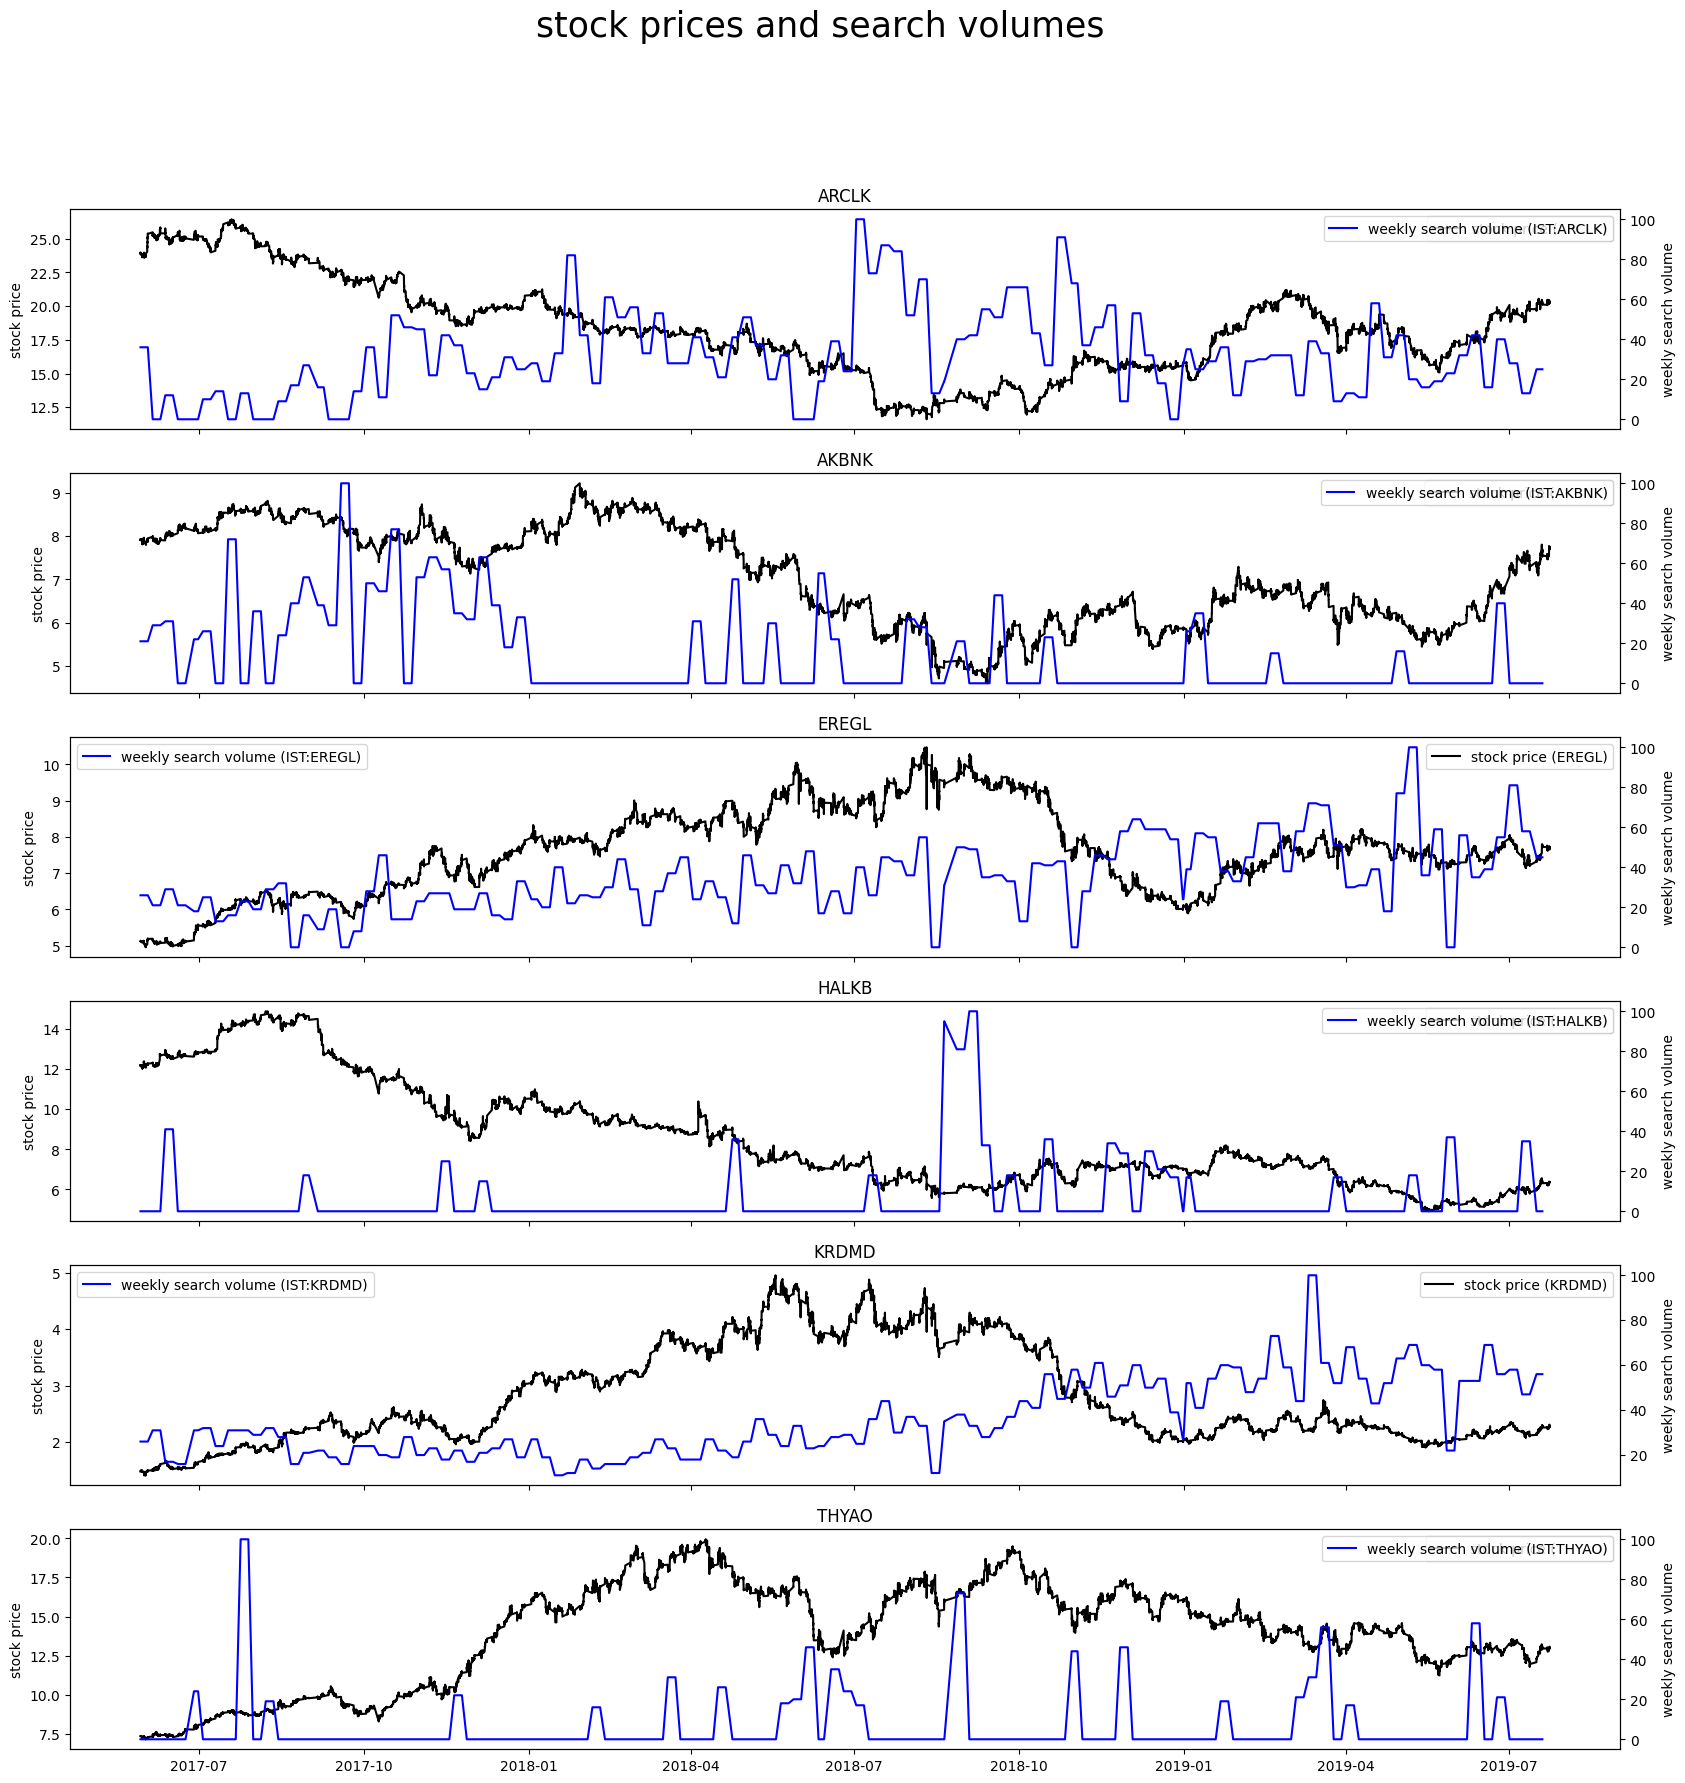

In [40]:
fig, ax = plt.subplots(len(stocks), 1, sharex=True, figsize=(20,20))

for i, stock_name in enumerate(stocks):
    ax[i].plot(res['timestamp'], res[f'price_{stock_name}'], color='black')
    ax[i].legend([f'stock price ({stock_name})'])
    ax[i].set_ylabel('stock price')
    
    twinx = ax[i].twinx()
    twinx.plot(res['timestamp'], res[f'weekly_search_volume_{stock_name}'], color='blue')
    twinx.legend([f'weekly search volume (IST:{stock_name})'])
    twinx.set_ylabel('weekly search volume')

    ax[i].set_title(stock_name)
    
plt.xlabel('time')
plt.suptitle('stock prices and search volumes', size=25)
plt.show()

In [41]:
print(res.columns)


Index(['timestamp', 'year', 'month', 'day', 'hour', 'minute', 'month_start',
       'week', 'week_start', 'price_ARCLK', 'monthly_mean_ARCLK',
       'monthly_std_ARCLK', 'monthly_Q1_ARCLK', 'monthly_Q3_ARCLK',
       'monthly_iqr_ARCLK', 'monthly_lb_iqr_ARCLK', 'monthly_ub_iqr_ARCLK',
       'monthly_lb_3sigma_ARCLK', 'monthly_ub_3sigma_ARCLK',
       'outlier_iqr_ARCLK', 'outlier_3sigma_ARCLK',
       'weekly_search_volume_ARCLK', 'price_AKBNK', 'monthly_mean_AKBNK',
       'monthly_std_AKBNK', 'monthly_Q1_AKBNK', 'monthly_Q3_AKBNK',
       'monthly_iqr_AKBNK', 'monthly_lb_iqr_AKBNK', 'monthly_ub_iqr_AKBNK',
       'monthly_lb_3sigma_AKBNK', 'monthly_ub_3sigma_AKBNK',
       'outlier_iqr_AKBNK', 'outlier_3sigma_AKBNK',
       'weekly_search_volume_AKBNK', 'price_EREGL', 'monthly_mean_EREGL',
       'monthly_std_EREGL', 'monthly_Q1_EREGL', 'monthly_Q3_EREGL',
       'monthly_iqr_EREGL', 'monthly_lb_iqr_EREGL', 'monthly_ub_iqr_EREGL',
       'monthly_lb_3sigma_EREGL', 'monthly_ub_3sigm

In [ ]:
# Loop through each stock
for stock in stocks:
    # Extract the relevant columns from the dataframe
    stock_df = res[['timestamp', f'price_{stock}', f'monthly_lb_iqr_{stock}', f'monthly_ub_iqr_{stock}', f'monthly_lb_3sigma_{stock}', f'monthly_ub_3sigma_{stock}', f'outlier_iqr_{stock}', f'outlier_3sigma_{stock}']]
    # Filter rows where either outlier flag is True
    outlier_rows = stock_df[(stock_df[f'outlier_iqr_{stock}']) | (stock_df[f'outlier_3sigma_{stock}'])]
    
    print(f"Outlier dates and indicators for {stock}:")
    
    printed_dates = set()

    for index, row in outlier_rows.iterrows():
        date = row['timestamp'].date()
        if date not in printed_dates:
            indicator = ''
            if row[f'outlier_iqr_{stock}']: 
                if row[f'price_{stock}'] < row[f'monthly_lb_iqr_{stock}']: 
                    indicator = 'Too Low (IQR)'
                else:
                    indicator = 'Too High (IQR)'
            
            if row[f'outlier_3sigma_{stock}']:
                if row[f'price_{stock}'] < row[f'monthly_lb_3sigma_{stock}']:
                    indicator = 'Too Low (3-Sigma)'
                else:
                    indicator = 'Too High (3-Sigma)'
            
            print(f"{date}: {indicator}")
            printed_dates.add(date)
            print("\n")


In [43]:
too_high_dates = {}
too_low_dates = {}

# Loop through each stock
for stock in stocks:
    # Extract the relevant columns from the dataframe
    stock_df = res[['timestamp', f'price_{stock}', f'monthly_lb_iqr_{stock}', f'monthly_ub_iqr_{stock}', f'monthly_lb_3sigma_{stock}', f'monthly_ub_3sigma_{stock}', f'outlier_iqr_{stock}', f'outlier_3sigma_{stock}']]
    
    # Filter rows where either outlier flag is True
    outlier_rows = stock_df[(stock_df[f'outlier_iqr_{stock}']) | (stock_df[f'outlier_3sigma_{stock}'])]

    too_high_dates[stock] = []
    too_low_dates[stock] = []

    printed_dates = set()

    for index, row in outlier_rows.iterrows():
        date = row['timestamp'].date()
        if date not in printed_dates:
            indicator = ''
            if row[f'outlier_iqr_{stock}']: 
                if row[f'price_{stock}'] < row[f'monthly_lb_iqr_{stock}']: 
                    indicator = 'Too Low (IQR)'
                    too_low_dates[stock].append(date)
                else:
                    indicator = 'Too High (IQR)'
                    too_high_dates[stock].append(date)
            
            if row[f'outlier_3sigma_{stock}']:
                if row[f'price_{stock}'] < row[f'monthly_lb_3sigma_{stock}']:
                    indicator = 'Too Low (3-Sigma)'
                    too_low_dates[stock].append(date)
                else:
                    indicator = 'Too High (3-Sigma)'
                    too_high_dates[stock].append(date)
            
            printed_dates.add(date)

# Print the too high and too low dates for each stock
for stock in stocks:
    formatted_high_dates = [date.strftime('%Y-%m-%d') for date in too_high_dates[stock]]
    formatted_low_dates = [date.strftime('%Y-%m-%d') for date in too_low_dates[stock]]

    print(f"{stock} - Too High Dates: {formatted_high_dates}")
    print("\n")
    print(f"{stock} - Too Low Dates: {formatted_low_dates}")
    print("\n")
    print("\n")


    


ARCLK - Too High Dates: ['2017-05-29', '2017-06-09', '2017-06-12', '2017-06-20', '2017-06-29', '2017-09-05', '2017-12-12', '2017-12-19', '2017-12-28', '2017-12-29', '2018-02-01', '2018-02-02', '2018-02-05', '2018-05-02', '2018-05-03', '2018-05-04', '2018-06-01', '2018-06-04', '2018-06-22', '2018-06-25', '2018-10-31', '2018-11-06', '2018-11-07', '2018-12-03', '2018-12-04', '2018-12-21', '2018-12-27', '2018-12-31', '2019-02-25', '2019-02-26', '2019-02-27', '2019-02-28', '2019-04-19', '2019-04-22', '2019-05-02', '2019-05-03']


ARCLK - Too Low Dates: ['2017-05-31', '2017-06-01', '2017-06-01', '2017-06-02', '2017-06-14', '2017-06-15', '2017-12-01', '2017-12-01', '2017-12-05', '2017-12-06', '2017-12-07', '2018-01-31', '2018-02-09', '2018-02-20', '2018-02-21', '2018-05-09', '2018-05-24', '2018-05-25', '2018-12-10', '2018-12-12', '2019-02-01', '2019-02-04', '2019-02-05', '2019-03-27', '2019-03-28', '2019-03-29', '2019-04-01', '2019-04-02', '2019-04-25', '2019-04-26', '2019-04-29']




AKBNK -

# ARCLK outlier analysis

ARCLK - Too High Dates: ['2017-05-29', '2017-06-09', '2017-06-12', '2017-06-20', '2017-06-29', '2017-09-05', '2017-12-12', '2017-12-19', '2017-12-28', '2017-12-29', '2018-02-01', '2018-02-02', '2018-02-05', '2018-05-02', '2018-05-03', '2018-05-04', '2018-06-01', '2018-06-04', '2018-06-22', '2018-06-25', '2018-10-31', '2018-11-06', '2018-11-07', '2018-12-03', '2018-12-04', '2018-12-21', '2018-12-27', '2018-12-31', '2019-02-25', '2019-02-26', '2019-02-27', '2019-02-28', '2019-04-19', '2019-04-22', '2019-05-02', '2019-05-03']


ARCLK - Too Low Dates: ['2017-05-31', '2017-06-01', '2017-06-01', '2017-06-02', '2017-06-14', '2017-06-15', '2017-12-01', '2017-12-01', '2017-12-05', '2017-12-06', '2017-12-07', '2018-01-31', '2018-02-09', '2018-02-20', '2018-02-21', '2018-05-09', '2018-05-24', '2018-05-25', '2018-12-10', '2018-12-12', '2019-02-01', '2019-02-04', '2019-02-05', '2019-03-27', '2019-03-28', '2019-03-29', '2019-04-01', '2019-04-02', '2019-04-25', '2019-04-26', '2019-04-29']

In [55]:
res['timestamp'] = pd.to_datetime(res['timestamp'], utc=True)
#here we have chosen the dates of the outliers found from the code above
from datetime import timedelta
dates =  ['2017-05-29', '2017-06-09', '2017-06-12', '2017-06-20', '2017-06-29', '2017-09-05', '2017-12-12', '2017-12-19', '2017-12-28', '2017-12-29', '2018-02-01', '2018-02-02', '2018-02-05', '2018-05-02', '2018-05-03', '2018-05-04', '2018-06-01', '2018-06-04', '2018-06-22', '2018-06-25', '2018-10-31', '2018-11-06', '2018-11-07', '2018-12-03', '2018-12-04', '2018-12-21', '2018-12-27', '2018-12-31', '2019-02-25', '2019-02-26', '2019-02-27', '2019-02-28', '2019-04-19', '2019-04-22', '2019-05-02', '2019-05-03',
          '2017-05-31', '2017-06-01', '2017-06-01', '2017-06-02', '2017-06-14', '2017-06-15', '2017-12-01', '2017-12-01', '2017-12-05', '2017-12-06', '2017-12-07', '2018-01-31', '2018-02-09', '2018-02-20', '2018-02-21', '2018-05-09', '2018-05-24', '2018-05-25', '2018-12-10', '2018-12-12', '2019-02-01', '2019-02-04', '2019-02-05', '2019-03-27', '2019-03-28', '2019-03-29', '2019-04-01', '2019-04-02', '2019-04-25', '2019-04-26', '2019-04-29']
#taking a 10 day interval around the specific time in order to receive more appropiate correlation results
for date in dates:
    specific_date = pd.to_datetime(date, utc=True)
    mask = (res['timestamp'] >= specific_date - timedelta(days=5)) & (res['timestamp'] <= specific_date + timedelta(days=5))
    
    selected_data = res.loc[mask, ['price_ARCLK', 'weekly_search_volume_ARCLK']]
    correlation = selected_data.corr().loc['price_ARCLK', 'weekly_search_volume_ARCLK']
    
    if not np.isnan(correlation) and abs(correlation) < 0.1:
        print('ARCLK search and stock correlation around:', specific_date)
        print(correlation)
        print('\n')

ARCLK search and stock correlation around: 2018-02-01 00:00:00+00:00
0.08577723621229477


ARCLK search and stock correlation around: 2018-12-03 00:00:00+00:00
-0.01833738248355266


ARCLK search and stock correlation around: 2019-03-28 00:00:00+00:00
-0.06784497759948281


ARCLK search and stock correlation around: 2019-03-29 00:00:00+00:00
0.0227618606779465




For ARCLK, most of the outliers seem to be correlated with the search data except for 2019/03/29-28 (low) - The reason for the decline in this period might be the announcement that tax reductions on home appliances would end on March 31, 2019. Investors who believed there would be a downturn in the sector when taxes increased likely preferred to sell their shares, which in turn drove down prices- , 2018/12/03 (high) - This peak was most likely due to new year- and 2018/02/01 (high) - The reason for the rise might also be due to the information in stock market news. For instance, the news from a day ago states: "2018 forecast: 20% growth, approximately 10% EBITDA margin"-.

# AKBNK outlier analysis 

AKBNK - Too High Dates: ['2017-08-07', '2017-08-08', '2017-10-20', '2017-10-26', '2017-10-31', '2017-12-29', '2018-01-29', '2018-02-01', '2018-06-01', '2018-06-01', '2018-06-04', '2018-06-05', '2018-11-27', '2018-12-03', '2018-12-03', '2018-12-04', '2019-02-01', '2019-02-05', '2019-04-05', '2019-04-08', '2019-05-02', '2019-05-03', '2019-07-19']


AKBNK - Too Low Dates: ['2017-09-27', '2017-09-28', '2017-09-29', '2017-10-09', '2017-10-10', '2018-02-08', '2018-02-09', '2018-02-14', '2018-04-30', '2018-05-31', '2018-10-04', '2018-10-05', '2018-11-01', '2018-11-01', '2018-11-02', '2018-12-12', '2018-12-13', '2018-12-14', '2018-12-17', '2018-12-18', '2019-03-27', '2019-03-28', '2019-05-13']

In [54]:
from datetime import timedelta
dates = ['2017-08-07', '2017-08-08', '2017-10-20', '2017-10-26', '2017-10-31', '2017-12-29', '2018-01-29', '2018-02-01', '2018-06-01', '2018-06-01', '2018-06-04', '2018-06-05', '2018-11-27', '2018-12-03', '2018-12-03', '2018-12-04', '2019-02-01', '2019-02-05', '2019-04-05', '2019-04-08', '2019-05-02', '2019-05-03', '2019-07-19','2017-09-27', '2017-09-28', '2017-09-29', '2017-10-09', '2017-10-10', '2018-02-08', '2018-02-09', '2018-02-14', '2018-04-30', '2018-05-31', '2018-10-04', '2018-10-05', '2018-11-01', '2018-11-01', '2018-11-02', '2018-12-12', '2018-12-13', '2018-12-14', '2018-12-17', '2018-12-18', '2019-03-27', '2019-03-28', '2019-05-13']
for date in dates:
    specific_date = pd.to_datetime(date, utc=True)
    mask = (res['timestamp'] >= specific_date - timedelta(days=5)) & (res['timestamp'] <= specific_date + timedelta(days=5))
    
    selected_data = res.loc[mask, ['price_AKBNK', 'weekly_search_volume_AKBNK']]
    correlation = selected_data.corr().loc['price_AKBNK', 'weekly_search_volume_AKBNK']
    
    if not np.isnan(correlation) and abs(correlation) < 0.2:
        print('AKBNK search and stock correlation around:', specific_date)
        print(correlation)
        print('\n')

AKBNK search and stock correlation around: 2017-08-07 00:00:00+00:00
-0.19802291234647787


AKBNK search and stock correlation around: 2017-08-08 00:00:00+00:00
-0.11541476035393562




For AKBNK, most of the outliers seem to be correlated with the search data except for 2017/08/07-08.We could not find a special cause related to Akbank itself but maybe this may be the result of foreign exchange rates. Refer this news: https://www.ntv.com.tr/ekonomi/dolar-zirveyi-yeniledi-dolar-kuru-bugun-ne-kadar-6-agustos-2018-dolar-euro-fi,jdcfhKR6_0iwj8f180MQgA

# EREGL outlier analysis 

EREGL - Too High Dates: ['2017-06-28', '2017-06-29', '2017-06-30', '2018-01-02', '2018-01-03', '2018-01-04', '2018-02-27', '2018-02-28', '2018-03-01', '2018-04-20', '2018-04-24', '2018-04-25', '2018-06-01', '2018-09-03', '2018-09-04', '2018-09-04', '2018-09-05', '2018-12-03', '2018-12-04', '2018-12-05', '2018-12-06', '2019-03-18', '2019-03-19', '2019-03-20', '2019-04-09', '2019-04-10']


EREGL - Too Low Dates: ['2017-05-31', '2017-08-16', '2017-09-25', '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12', '2018-01-15', '2018-01-16', '2018-04-11', '2018-07-12', '2018-07-13', '2018-07-16', '2018-08-10', '2018-08-16', '2018-08-17', '2018-09-26', '2019-03-08', '2019-03-27', '2019-04-25', '2019-04-26', '2019-04-29']


In [58]:
from datetime import timedelta
dates = ['2017-06-28', '2017-06-29', '2017-06-30', '2018-01-02', '2018-01-03', '2018-01-04', '2018-02-27', '2018-02-28', '2018-03-01', '2018-04-20', '2018-04-24', '2018-04-25', '2018-06-01', '2018-09-03', '2018-09-04', '2018-09-04', '2018-09-05', '2018-12-03', '2018-12-04', '2018-12-05', '2018-12-06', '2019-03-18', '2019-03-19', '2019-03-20', '2019-04-09', '2019-04-10',
         '2017-05-31', '2017-08-16', '2017-09-25', '2018-01-09', '2018-01-10', '2018-01-11', '2018-01-12', '2018-01-15', '2018-01-16', '2018-04-11', '2018-07-12', '2018-07-13', '2018-07-16', '2018-08-10', '2018-08-16', '2018-08-17', '2018-09-26', '2019-03-08', '2019-03-27', '2019-04-25', '2019-04-26', '2019-04-29']
for date in dates:
    specific_date = pd.to_datetime(date, utc=True)
    mask = (res['timestamp'] >= specific_date - timedelta(days=5)) & (res['timestamp'] <= specific_date + timedelta(days=5))
    
    selected_data = res.loc[mask, ['price_EREGL', 'weekly_search_volume_EREGL']]
    correlation = selected_data.corr().loc['price_EREGL', 'weekly_search_volume_EREGL']
    
    if not np.isnan(correlation) and abs(correlation) < 0.1:
        print('EREGL search and stock correlation around:', specific_date)
        print(correlation)
        print('\n')

EREGL search and stock correlation around: 2019-03-20 00:00:00+00:00
0.007021907983654544


EREGL search and stock correlation around: 2018-08-16 00:00:00+00:00
0.04265504632621749


EREGL search and stock correlation around: 2018-08-17 00:00:00+00:00
0.04265504632621749




For EREGL, most of the outliers seem to be correlated with the search data except for 2019/03/20, 2018/08/16 and 2018/08/17. On 2019/03/19 President Erdoğan announced that 'Ereğli Demir Çelik Fabrikası' made a new investment decision worth 1 billion dollars. (https://www.bloomberght.com/erdogan-bir-yanlis-yaptik-idami-kaldirdik-2205463). This is most likely the reason of the peak on March 20th. And a fire hazard happened on 2018/08/16 in Ereğli which may be the cause of sudden drop on these 2 consecutive days. (https://www.haber7.com/zonguldak/2692559-ereglide-yangin)

# HALKB outlier analysis

HALKB - Too High Dates: ['2017-05-31', '2017-09-05', '2017-09-06', '2017-09-07', '2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05', '2018-02-01', '2018-03-01', '2018-04-05', '2018-04-06', '2018-04-09', '2018-05-02', '2018-05-03', '2018-05-17', '2018-06-04', '2018-06-25', '2018-06-25', '2018-08-09', '2018-09-25', '2018-09-26', '2018-09-27', '2018-09-28', '2018-11-05', '2018-11-07', '2018-11-08', '2018-11-14', '2019-05-02', '2019-06-26', '2019-06-27', '2019-06-28', '2019-07-18', '2019-07-19']


HALKB - Too Low Dates: ['2017-08-16', '2018-04-30', '2018-05-08', '2018-05-09', '2018-09-12', '2018-09-13', '2018-11-01', '2018-11-01', '2018-11-02', '2018-11-20', '2018-12-14', '2018-12-17', '2018-12-18', '2019-03-27', '2019-03-28', '2019-03-29']

In [59]:
from datetime import timedelta
dates =['2017-05-31', '2017-09-05', '2017-09-06', '2017-09-07', '2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05', '2018-02-01', '2018-03-01', '2018-04-05', '2018-04-06', '2018-04-09', '2018-05-02', '2018-05-03', '2018-05-17', '2018-06-04', '2018-06-25', '2018-06-25', '2018-08-09', '2018-09-25', '2018-09-26', '2018-09-27', '2018-09-28', '2018-11-05', '2018-11-07', '2018-11-08', '2018-11-14', '2019-05-02', '2019-06-26', '2019-06-27', '2019-06-28', '2019-07-18', '2019-07-19',
        '2017-08-16', '2018-04-30', '2018-05-08', '2018-05-09', '2018-09-12', '2018-09-13', '2018-11-01', '2018-11-01', '2018-11-02', '2018-11-20', '2018-12-14', '2018-12-17', '2018-12-18', '2019-03-27', '2019-03-28', '2019-03-29']
for date in dates:
    specific_date = pd.to_datetime(date, utc=True)
    mask = (res['timestamp'] >= specific_date - timedelta(days=5)) & (res['timestamp'] <= specific_date + timedelta(days=5))
    
    selected_data = res.loc[mask, ['price_HALKB', 'weekly_search_volume_HALKB']]
    correlation = selected_data.corr().loc['price_HALKB', 'weekly_search_volume_HALKB']
    
    if not np.isnan(correlation) and abs(correlation) < 0.2:
        print('HALKB search and stock correlation around:', specific_date)
        print(correlation)
        print('\n')

HALKB search and stock correlation around: 2018-09-28 00:00:00+00:00
0.09665463263927071


HALKB search and stock correlation around: 2018-09-13 00:00:00+00:00
-0.170742584717627


HALKB search and stock correlation around: 2018-12-17 00:00:00+00:00
-0.18839603100242114




For HALKB, most of the outliers seem to be correlated with the search data except for 2018/09/13 (low) - this might be due to the news that Halkbank sold cheap dollars due to a technical issue at the beginning of September (https://www.bloomberght.com/haberler/haber/2151652-halk-bankasi-ndan-dusuk-kur-aciklamasi)-, 2018/09/28 (high) and 2018/12/17 (low)- we could not pinpoint a result for these 2 dates but might be due to official interest rates announced in Turkiye.

# KRMD outlier analysis

KRDMD - Too High Dates: ['2017-05-29', '2017-05-30', '2017-06-12', '2017-06-13', '2017-06-30', '2018-06-01', '2018-06-04', '2018-06-05', '2018-07-09', '2018-08-09', '2018-09-03', '2018-09-04', '2018-12-03', '2018-12-04', '2019-03-19', '2019-03-20', '2019-04-09', '2019-05-02', '2019-05-03']


KRDMD - Too Low Dates: ['2017-05-31', '2017-06-01', '2018-01-15', '2018-01-15', '2018-01-16', '2018-01-16', '2018-08-17', '2018-09-11', '2018-09-26', '2018-09-27', '2018-09-28', '2019-04-29', '2019-04-30', '2019-05-15']


In [61]:
from datetime import timedelta
dates = ['2017-05-29', '2017-05-30', '2017-06-12', '2017-06-13', '2017-06-30', '2018-06-01', '2018-06-04', '2018-06-05', '2018-07-09', '2018-08-09', '2018-09-03', '2018-09-04', '2018-12-03', '2018-12-04', '2019-03-19', '2019-03-20', '2019-04-09', '2019-05-02', '2019-05-03',
         '2017-05-31', '2017-06-01', '2018-01-15', '2018-01-15', '2018-01-16', '2018-01-16', '2018-08-17', '2018-09-11', '2018-09-26', '2018-09-27', '2018-09-28', '2019-04-29', '2019-04-30', '2019-05-15']
for date in dates:
    specific_date = pd.to_datetime(date, utc=True)
    mask = (res['timestamp'] >= specific_date - timedelta(days=5)) & (res['timestamp'] <= specific_date + timedelta(days=5))
    
    selected_data = res.loc[mask, ['price_KRDMD', 'weekly_search_volume_KRDMD']]
    correlation = selected_data.corr().loc['price_KRDMD', 'weekly_search_volume_KRDMD']
    
    if not np.isnan(correlation) and abs(correlation) < 0.1:
        print('KRDMD search and stock correlation around:', specific_date)
        print(correlation)
        print('\n')

KRDMD search and stock correlation around: 2018-07-09 00:00:00+00:00
-0.020357017447022813


KRDMD search and stock correlation around: 2018-12-03 00:00:00+00:00
-0.05067678837947639


KRDMD search and stock correlation around: 2019-04-09 00:00:00+00:00
0.08249359067452952




For KRDMD, most of the outliers seem to be correlated with the search data except for (all high) 2019/04/09, 2018/12/03 and 2018/07/09 which all have really small correlation values. We could not find the exact reasons behind but the possible reasons are: economic atmosphere in Turkiye, competitors etc.

# THYAO outlier analysis

THYAO - Too High Dates: ['2017-06-23', '2017-06-28', '2017-06-29', '2017-06-30', '2017-11-28', '2017-11-30', '2018-02-26', '2018-02-27', '2018-02-28', '2018-05-28', '2018-05-29', '2018-05-30', '2018-05-31', '2018-12-03', '2019-01-02', '2019-01-03', '2019-01-30', '2019-01-31', '2019-05-02', '2019-05-03', '2019-05-06', '2019-05-07', '2019-05-08', '2019-06-10', '2019-06-20']


THYAO - Too Low Dates: ['2017-06-01', '2017-06-02', '2017-07-03', '2017-07-04', '2017-07-05', '2017-07-06', '2017-07-07', '2018-01-15', '2018-01-16', '2018-02-09', '2018-04-25', '2018-04-30', '2018-05-08', '2018-05-09', '2018-05-24', '2018-05-25', '2018-08-16', '2018-08-17', '2018-08-20', '2018-12-12', '2018-12-13', '2018-12-14', '2018-12-17', '2018-12-18', '2019-01-17', '2019-04-01', '2019-04-02', '2019-04-03', '2019-04-04', '2019-05-22', '2019-05-23', '2019-06-03', '2019-06-07', '2019-06-26']

In [62]:
from datetime import timedelta
dates =  ['2017-06-23', '2017-06-28', '2017-06-29', '2017-06-30', '2017-11-28', '2017-11-30', '2018-02-26', '2018-02-27', '2018-02-28', '2018-05-28', '2018-05-29', '2018-05-30', '2018-05-31', '2018-12-03', '2019-01-02', '2019-01-03', '2019-01-30', '2019-01-31', '2019-05-02', '2019-05-03', '2019-05-06', '2019-05-07', '2019-05-08', '2019-06-10', '2019-06-20',
          '2017-06-01', '2017-06-02', '2017-07-03', '2017-07-04', '2017-07-05', '2017-07-06', '2017-07-07', '2018-01-15', '2018-01-16', '2018-02-09', '2018-04-25', '2018-04-30', '2018-05-08', '2018-05-09', '2018-05-24', '2018-05-25', '2018-08-16', '2018-08-17', '2018-08-20', '2018-12-12', '2018-12-13', '2018-12-14', '2018-12-17', '2018-12-18', '2019-01-17', '2019-04-01', '2019-04-02', '2019-04-03', '2019-04-04', '2019-05-22', '2019-05-23', '2019-06-03', '2019-06-07', '2019-06-26']
for date in dates:
    specific_date = pd.to_datetime(date, utc=True)
    mask = (res['timestamp'] >= specific_date - timedelta(days=5)) & (res['timestamp'] <= specific_date + timedelta(days=5))
    
    selected_data = res.loc[mask, ['price_THYAO', 'weekly_search_volume_THYAO']]
    correlation = selected_data.corr().loc['price_THYAO', 'weekly_search_volume_THYAO']
    
    if not np.isnan(correlation) and abs(correlation) < 0.2:
        print('THYAO search and stock correlation around:', specific_date)
        print(correlation)
        print('\n')

THYAO search and stock correlation around: 2019-06-10 00:00:00+00:00
0.11867757285665075


THYAO search and stock correlation around: 2019-06-20 00:00:00+00:00
-0.16782059594743007


THYAO search and stock correlation around: 2019-06-26 00:00:00+00:00
-0.07700255643394933




For THYAO, most of the outliers seem to be correlated with the search data except for 2019/06/10 (high), 2019/06/20 (high) and 2019/06/26 (low) which are really close dates. The peaks are most likely correlated with covid pandemic and taking comparative advantage in this hard period (https://www.bbc.com/turkce/haberler-turkiye-52927751). There is no exact event linked to the low point but it may be due to the much increase in prices before as it is only 6 days after the peak p

# Summary

Initially, we developed a custom algorithm, as previously detailed, to identify a two-year period free of missing (NA) values across the six stocks selected for our study. Unfortunately, our algorithm failed to yield any suitable time span that aligned with our criteria.

Subsequently, we enlisted the assistance of ChatGPT to devise an alternative algorithm, suspecting a potential oversight in our initial code. Nonetheless, even the ChatGPT-recommended algorithm was unable to pinpoint a period that met our requirements. This led us to adjust the algorithm's parameters to identify a two-year span with no consecutive NA values for any given stock. Leveraging this revised algorithm, we successfully identified overlapping two-year periods for six stocks, ensuring representation from at least three distinct industry sectors.

Following this preparatory phase, we conducted various analyses. We generated boxplots for monthly data, identified outliers via the Interquartile Range (IQR) method, calculated three-sigma limits, and pinpointed corresponding outliers.

Upon completing these analytical processes, we proceeded to create visual representations of the data and our analytical findings.

In the final stage of our analysis, we turned our attention to the integration of Google Trends Open Source data into our dataset as a new variable. We explored the relationship between this data and the stock prices of our outliers on specific dates.

Our analysis predominantly revealed a robust correlation between stock price movements and Google Trends data. However, we noted that a subset of outliers exhibited a notably weaker correlation with Google Trends. To understand these anomalies, we conducted supplementary research via Google to ascertain possible explanations for these deviations as can be seen above. 

Although we observed a strong correlation with Google Trends as expected, we also realized that the chosen stock prices were in a strong correlation with sectoral influences, real-world events, incidents that were happening in Turkey at that specific moment, and other company-specific successes and failures.

# References

1.After trying the algorithm that we have found for detecting a 2-year time span without any NA values for 6 different stocks, and not finding any suitable interval, we decided to try the algorithm the ChatGPT will suggest.

However, even the code generated from ChatGPT returned empty results for our data. That's why we have decided to modify the code and calculate the NA gaps which are smaller than 2 consecutive NA values. And we have used the results from the modified code to choose our stocks and their date ranges. 

Here you can find the ChatGPT prompt that we used: https://chat.openai.com/share/a00ace8c-4ed8-48e8-b91b-1725074f0b05

2.Also, we got help from the ChatGPT in our summarization part in order to explain what we have done in better summary writing. 

Although the summarizing part was done by us, we have used ChatGPT for paraphrasing, you can see the prompt here: https://chat.openai.com/share/c1ff3a21-ab26-48d5-81b7-635255c8dc42 

3.Other references where we needed to detect reasons behind the found outlier values where correlation with Google Trends was insufficient to explain, can be found above in the related parts. 
